In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso,  BayesianRidge, LassoLarsIC, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [2]:
#load the data
data = pd.read_csv('MiningProcess_Flotation_Plant_Database.csv')
data

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235",...,"250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
1,2017-03-10 01:00:00,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532",...,"248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"
2,2017-03-10 01:00:00,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874",...,"248,071","451,24","468,927","434,61","449,688","484,411","447,826","458,567","66,91","1,31"
3,2017-03-10 01:00:00,"55,2","16,98","3047,36","568,665","397,939","10,0689","1,74","249,917","254,487",...,"251,147","452,441","458,165","442,865","446,21","471,411","437,69","427,669","66,91","1,31"
4,2017-03-10 01:00:00,"55,2","16,98","3033,69","558,167","400,254","10,0697","1,74","250,203","252,136",...,"248,928","452,441","452,9","450,523","453,67","462,598","443,682","425,679","66,91","1,31"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,2017-09-09 23:00:00,"49,75","23,2","2710,94","441,052","386,57","9,62129","1,65365","302,344","298,786",...,"313,695","392,16","430,702","872,008","418,725","497,548","446,357","416,892","64,27","1,71"
737449,2017-09-09 23:00:00,"49,75","23,2","2692,01","473,436","384,939","9,62063","1,65352","303,013","301,879",...,"236,7","401,505","404,616","864,409","418,377","506,398","372,995","426,337","64,27","1,71"
737450,2017-09-09 23:00:00,"49,75","23,2","2692,2","500,488","383,496","9,61874","1,65338","303,662","307,397",...,"225,879","408,899","399,316","867,598","419,531","503,414","336,035","433,13","64,27","1,71"
737451,2017-09-09 23:00:00,"49,75","23,2","1164,12","491,548","384,976","9,61686","1,65324","302,55","301,959",...,"308,115","405,107","466,832","876,591","407,299","502,301","340,844","433,966","64,27","1,71"


In [3]:
data.shape

(737453, 24)

In [4]:
data.dtypes

date                            object
% Iron Feed                     object
% Silica Feed                   object
Starch Flow                     object
Amina Flow                      object
Ore Pulp Flow                   object
Ore Pulp pH                     object
Ore Pulp Density                object
Flotation Column 01 Air Flow    object
Flotation Column 02 Air Flow    object
Flotation Column 03 Air Flow    object
Flotation Column 04 Air Flow    object
Flotation Column 05 Air Flow    object
Flotation Column 06 Air Flow    object
Flotation Column 07 Air Flow    object
Flotation Column 01 Level       object
Flotation Column 02 Level       object
Flotation Column 03 Level       object
Flotation Column 04 Level       object
Flotation Column 05 Level       object
Flotation Column 06 Level       object
Flotation Column 07 Level       object
% Iron Concentrate              object
% Silica Concentrate            object
dtype: object

In [5]:
data.isnull().sum()

date                            0
% Iron Feed                     0
% Silica Feed                   0
Starch Flow                     0
Amina Flow                      0
Ore Pulp Flow                   0
Ore Pulp pH                     0
Ore Pulp Density                0
Flotation Column 01 Air Flow    0
Flotation Column 02 Air Flow    0
Flotation Column 03 Air Flow    0
Flotation Column 04 Air Flow    0
Flotation Column 05 Air Flow    0
Flotation Column 06 Air Flow    0
Flotation Column 07 Air Flow    0
Flotation Column 01 Level       0
Flotation Column 02 Level       0
Flotation Column 03 Level       0
Flotation Column 04 Level       0
Flotation Column 05 Level       0
Flotation Column 06 Level       0
Flotation Column 07 Level       0
% Iron Concentrate              0
% Silica Concentrate            0
dtype: int64

In [6]:
# Replacing commas with decimal point
for column in data.columns:
    data[column] = data[column].apply(lambda x : x.replace(',' , '.'))
data

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.37,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.56,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.068,1.74,249.741,247.874,...,248.071,451.24,468.927,434.61,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.21,471.411,437.69,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.9,450.523,453.67,462.598,443.682,425.679,66.91,1.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,2017-09-09 23:00:00,49.75,23.2,2710.94,441.052,386.57,9.62129,1.65365,302.344,298.786,...,313.695,392.16,430.702,872.008,418.725,497.548,446.357,416.892,64.27,1.71
737449,2017-09-09 23:00:00,49.75,23.2,2692.01,473.436,384.939,9.62063,1.65352,303.013,301.879,...,236.7,401.505,404.616,864.409,418.377,506.398,372.995,426.337,64.27,1.71
737450,2017-09-09 23:00:00,49.75,23.2,2692.2,500.488,383.496,9.61874,1.65338,303.662,307.397,...,225.879,408.899,399.316,867.598,419.531,503.414,336.035,433.13,64.27,1.71
737451,2017-09-09 23:00:00,49.75,23.2,1164.12,491.548,384.976,9.61686,1.65324,302.55,301.959,...,308.115,405.107,466.832,876.591,407.299,502.301,340.844,433.966,64.27,1.71


In [7]:
# Converting the attributes to desired data types
data.iloc[:,1:24] = data.iloc[:,1:24].astype('float')
data.dtypes

date                             object
% Iron Feed                     float64
% Silica Feed                   float64
Starch Flow                     float64
Amina Flow                      float64
Ore Pulp Flow                   float64
Ore Pulp pH                     float64
Ore Pulp Density                float64
Flotation Column 01 Air Flow    float64
Flotation Column 02 Air Flow    float64
Flotation Column 03 Air Flow    float64
Flotation Column 04 Air Flow    float64
Flotation Column 05 Air Flow    float64
Flotation Column 06 Air Flow    float64
Flotation Column 07 Air Flow    float64
Flotation Column 01 Level       float64
Flotation Column 02 Level       float64
Flotation Column 03 Level       float64
Flotation Column 04 Level       float64
Flotation Column 05 Level       float64
Flotation Column 06 Level       float64
Flotation Column 07 Level       float64
% Iron Concentrate              float64
% Silica Concentrate            float64
dtype: object

In [8]:
#Convert date column to datetime
data['date'] = pd.to_datetime(data['date'])

In [9]:
data.dtypes

date                            datetime64[ns]
% Iron Feed                            float64
% Silica Feed                          float64
Starch Flow                            float64
Amina Flow                             float64
Ore Pulp Flow                          float64
Ore Pulp pH                            float64
Ore Pulp Density                       float64
Flotation Column 01 Air Flow           float64
Flotation Column 02 Air Flow           float64
Flotation Column 03 Air Flow           float64
Flotation Column 04 Air Flow           float64
Flotation Column 05 Air Flow           float64
Flotation Column 06 Air Flow           float64
Flotation Column 07 Air Flow           float64
Flotation Column 01 Level              float64
Flotation Column 02 Level              float64
Flotation Column 03 Level              float64
Flotation Column 04 Level              float64
Flotation Column 05 Level              float64
Flotation Column 06 Level              float64
Flotation Col

In [10]:
#Extracting date features
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['hour'] = data['date'].dt.hour

In [11]:
data['month'].unique

<bound method Series.unique of 0         3
1         3
2         3
3         3
4         3
         ..
737448    9
737449    9
737450    9
737451    9
737452    9
Name: month, Length: 737453, dtype: int64>

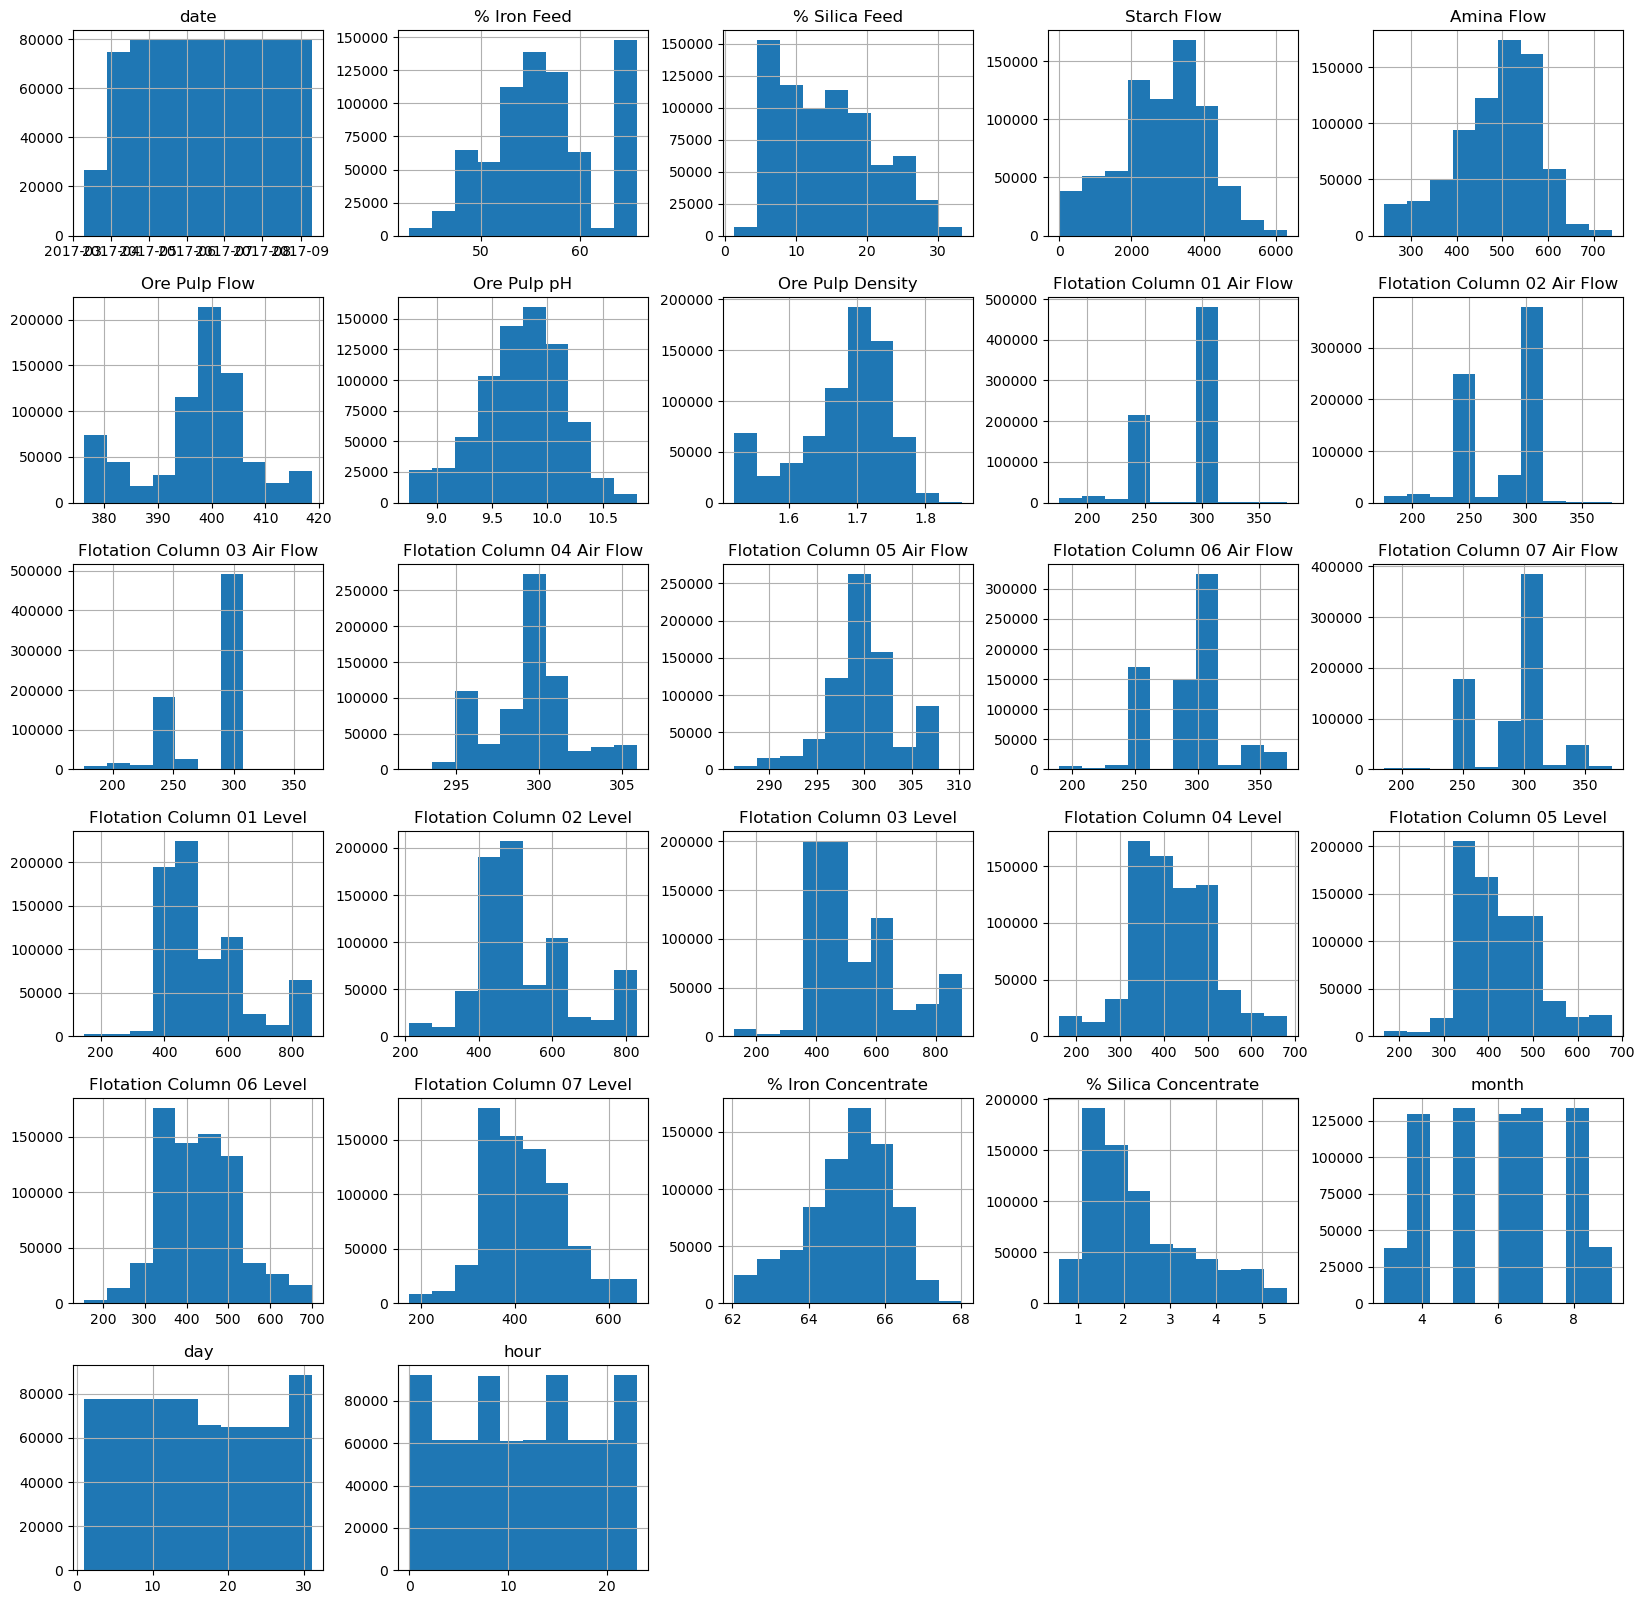

In [12]:
#Plotting histograms
data.hist(figsize = (20, 20))
plt.show()

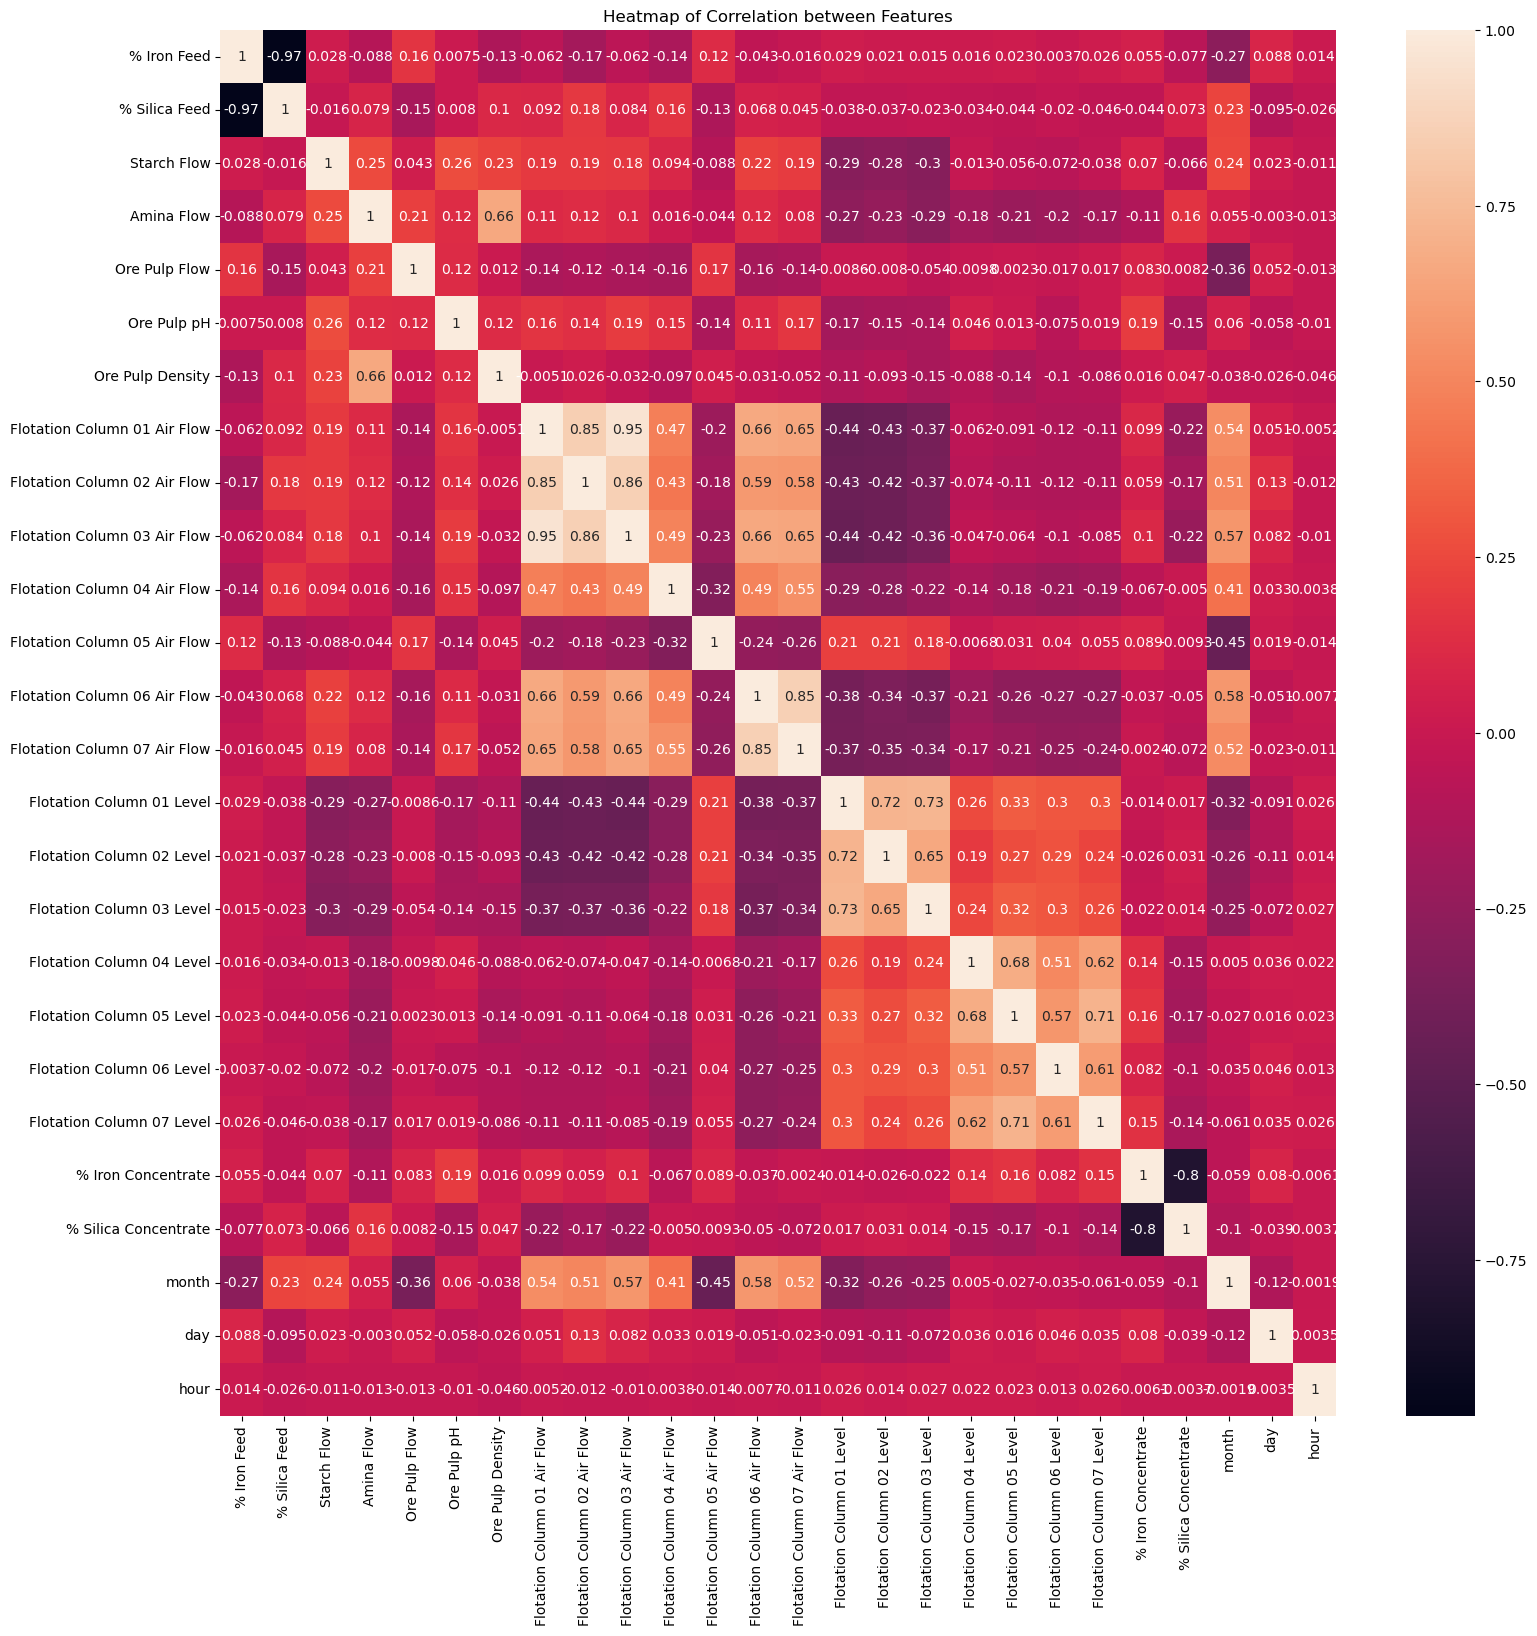

In [13]:
#Correlation plot
fig, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True)
plt.title('Heatmap of Correlation between Features')
plt.show()

From this pair plot, we can infer that there is a relationship between iron feed and silica feed. Also, a relationship between silica concentrate and iron concentrate.

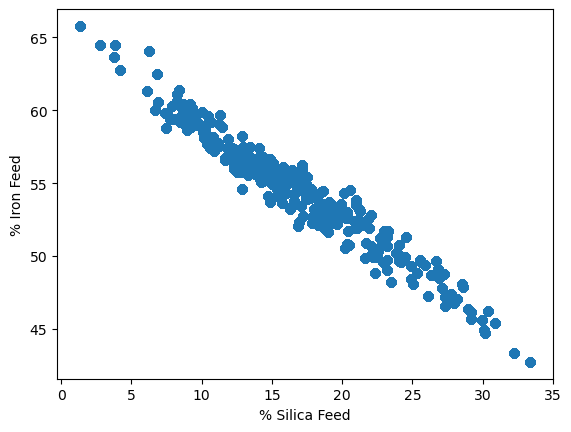

In [14]:
#Scatter plots
plt.scatter(data['% Silica Feed'], data['% Iron Feed'])
plt.xlabel('% Silica Feed')
plt.ylabel('% Iron Feed')
plt.show()

They are perfectly inversely correlated. That means when Iron feed(%) goes down, the percentage of silica feed goes up.

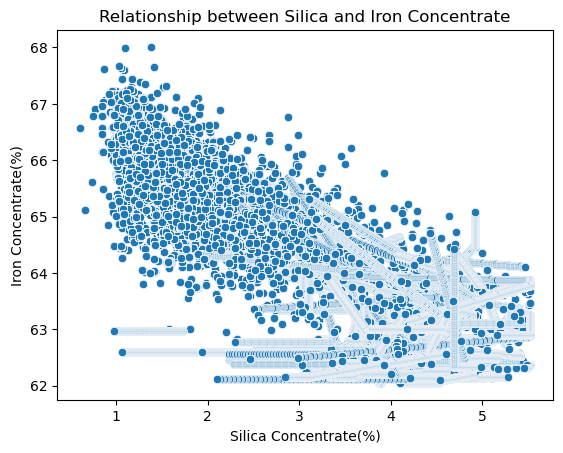

In [15]:
sns.scatterplot(x='% Silica Concentrate', y='% Iron Concentrate', data=data)
plt.xlabel('Silica Concentrate(%)')
plt.ylabel('Iron Concentrate(%)')
plt.title('Relationship between Silica and Iron Concentrate')
plt.show()

In [16]:
data = data.drop(columns = ['date', 'day', 'month','hour'])

In [17]:
data

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,55.20,16.98,3019.53,557.434,395.713,10.06640,1.74000,249.214,253.235,250.576,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,55.20,16.98,3024.41,563.965,397.383,10.06720,1.74000,249.719,250.532,250.862,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,55.20,16.98,3043.46,568.054,399.668,10.06800,1.74000,249.741,247.874,250.313,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,55.20,16.98,3047.36,568.665,397.939,10.06890,1.74000,249.917,254.487,250.049,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,55.20,16.98,3033.69,558.167,400.254,10.06970,1.74000,250.203,252.136,249.895,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,49.75,23.20,2710.94,441.052,386.570,9.62129,1.65365,302.344,298.786,299.163,...,313.695,392.160,430.702,872.008,418.725,497.548,446.357,416.892,64.27,1.71
737449,49.75,23.20,2692.01,473.436,384.939,9.62063,1.65352,303.013,301.879,299.487,...,236.700,401.505,404.616,864.409,418.377,506.398,372.995,426.337,64.27,1.71
737450,49.75,23.20,2692.20,500.488,383.496,9.61874,1.65338,303.662,307.397,299.487,...,225.879,408.899,399.316,867.598,419.531,503.414,336.035,433.130,64.27,1.71
737451,49.75,23.20,1164.12,491.548,384.976,9.61686,1.65324,302.550,301.959,298.045,...,308.115,405.107,466.832,876.591,407.299,502.301,340.844,433.966,64.27,1.71


In [18]:
#Scaling the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
data = pd.DataFrame(scaled_data, columns = data.columns)

In [19]:
#Splitting the data
X = data.drop(columns = ['% Silica Concentrate'])
y = data['% Silica Concentrate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [20]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [21]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error
from sklearn.metrics import explained_variance_score

# Linear Regression
lr_r2 = r2_score(y_test, y_pred)
lr_mse = mean_squared_error(y_test, y_pred)
lr_mae = mean_absolute_error(y_test, y_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
lr_explained_variance = explained_variance_score(y_test, y_pred)


In [22]:
print("R-squared: {:.4f}".format(lr_r2))
print("MSE: {:.4f}".format(lr_mse))
print("MAE: {:.4f}".format(lr_mae))
print("RMSE: {:.4f}".format(lr_rmse))
print("Explained Variance: {:.4f}".format(lr_explained_variance))


R-squared: 0.6795
MSE: 0.0167
MAE: 0.0998
RMSE: 0.1291
Explained Variance: 0.6795


In [23]:
# Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

lasso_r2 = r2_score(y_test, y_pred)
lasso_mse = mean_squared_error(y_test, y_pred)
lasso_mae = mean_absolute_error(y_test, y_pred)
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
lasso_explained_variance = explained_variance_score(y_test, y_pred)

print("Lasso Results:\n")
print("R-squared: {:.4f}".format(lasso_r2))
print("MSE: {:.4f}".format(lasso_mse))
print("MAE: {:.4f}".format(lasso_mae))
print("RMSE: {:.4f}".format(lasso_rmse))
print("Explained Variance: {:.4f}".format(lasso_explained_variance))


Lasso Results:

R-squared: -0.0000
MSE: 0.0520
MAE: 0.1857
RMSE: 0.2280
Explained Variance: 0.0000


In [24]:
# Ridge
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

ridge_r2 = r2_score(y_test, y_pred)
ridge_mse = mean_squared_error(y_test, y_pred)
ridge_mae = mean_absolute_error(y_test, y_pred)
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
ridge_explained_variance = explained_variance_score(y_test, y_pred)

print("Ridge Results:\n")
print("R-squared: {:.4f}".format(ridge_r2))
print("MSE: {:.4f}".format(ridge_mse))
print("MAE: {:.4f}".format(ridge_mae))
print("RMSE: {:.4f}".format(ridge_rmse))
print("Explained Variance: {:.4f}".format(ridge_explained_variance))


Ridge Results:

R-squared: 0.6795
MSE: 0.0167
MAE: 0.0998
RMSE: 0.1291
Explained Variance: 0.6795


In [25]:
# Elastic Net
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)
y_pred = elastic_net.predict(X_test)

elastic_net_r2 = r2_score(y_test, y_pred)
elastic_net_mse = mean_squared_error(y_test, y_pred)
elastic_net_mae = mean_absolute_error(y_test, y_pred)
elastic_net_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
elastic_net_explained_variance = explained_variance_score(y_test, y_pred)

print("Elastic Net Results:\n")
print("R-squared: {:.4f}".format(elastic_net_r2))
print("MSE: {:.4f}".format(elastic_net_mse))
print("MAE: {:.4f}".format(elastic_net_mae))
print("RMSE: {:.4f}".format(elastic_net_rmse))


Elastic Net Results:

R-squared: -0.0000
MSE: 0.0520
MAE: 0.1857
RMSE: 0.2280


In [26]:
from sklearn.tree import DecisionTreeRegressor
# Decision Tree
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

dt_mse = mean_squared_error(y_test, y_pred)
dt_mae = mean_absolute_error(y_test, y_pred)
dt_explained_variance = explained_variance_score(y_test, y_pred)
dt_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Decision Tree Results:\n")
print("MSE: {:.4f}".format(dt_mse))
print("MAE: {:.4f}".format(dt_mae))
print("Explained Variance: {:.4f}".format(dt_explained_variance))
print("RMSE: {:.4f}".format(dt_rmse))


Decision Tree Results:

MSE: 0.0003
MAE: 0.0016
Explained Variance: 0.9938
RMSE: 0.0179


In [27]:
# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

rf_mse = mean_squared_error(y_test, y_pred)
rf_mae = mean_absolute_error(y_test, y_pred)
rf_explained_variance = explained_variance_score(y_test, y_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Random Forest Results:\n")
print("MSE: {:.4f}".format(rf_mse))
print("MAE: {:.4f}".format(rf_mae))
print("Explained Variance: {:.4f}".format(rf_explained_variance))
print("RMSE: {:.4f}".format(rf_rmse))


Random Forest Results:

MSE: 0.0001
MAE: 0.0020
Explained Variance: 0.9985
RMSE: 0.0087


In [28]:
# Gradient Boosting
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

gb_mse = mean_squared_error(y_test, y_pred)
gb_mae = mean_absolute_error(y_test, y_pred)
gb_explained_variance = explained_variance_score(y_test, y_pred)
gb_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Gradient Boosting Results:\n")
print("MSE: {:.4f}".format(gb_mse))
print("MAE: {:.4f}".format(gb_mae))
print("Explained Variance: {:.4f}".format(gb_explained_variance))
print("RMSE: {:.4f}".format(gb_rmse))


Gradient Boosting Results:

MSE: 0.0108
MAE: 0.0766
Explained Variance: 0.7923
RMSE: 0.1039


In [29]:
from xgboost import XGBRegressor

# XGBoost
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

xgb_mse = mean_squared_error(y_test, y_pred)
xgb_mae = mean_absolute_error(y_test, y_pred)
xgb_explained_variance = explained_variance_score(y_test, y_pred)
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("XGBoost Results:\n")
print("MSE: {:.4f}".format(xgb_mse))
print("MAE: {:.4f}".format(xgb_mae))
print("Explained Variance: {:.4f}".format(xgb_explained_variance))
print("RMSE: {:.4f}".format(xgb_rmse))


XGBoost Results:

MSE: 0.0030
MAE: 0.0386
Explained Variance: 0.9423
RMSE: 0.0548


In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score
from keras.models import Sequential
from keras.layers import Dense
# ANN
ann = Sequential()
ann.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
ann.add(Dense(16, activation='relu'))
ann.add(Dense(1, activation='linear'))
ann.compile(optimizer='adam', loss='mean_squared_error')
ann.fit(X_train, y_train, epochs=20, batch_size=32)
y_pred = ann.predict(X_test)

ann_mse = mean_squared_error(y_test, y_pred)
ann_mae = mean_absolute_error(y_test, y_pred)
ann_explained_variance = explained_variance_score(y_test, y_pred)
ann_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Artificial Neural Network Results:\n")
print("MSE: {:.4f}".format(ann_mse))
print("MAE: {:.4f}".format(ann_mae))
print("Explained Variance: {:.4f}".format(ann_explained_variance))
print("RMSE: {:.4f}".format(ann_rmse))


Epoch 1/20
18437/18437 [==============================] - 29s 2ms/step - loss: 0.0140
Epoch 2/20
18437/18437 [==============================] - 29s 2ms/step - loss: 0.0117
Epoch 3/20
18437/18437 [==============================] - 25s 1ms/step - loss: 0.0111
Epoch 4/20
18437/18437 [==============================] - 26s 1ms/step - loss: 0.0108
Epoch 5/20
18437/18437 [==============================] - 27s 1ms/step - loss: 0.0106
Epoch 6/20
18437/18437 [==============================] - 28s 2ms/step - loss: 0.0104
Epoch 7/20
18437/18437 [==============================] - 26s 1ms/step - loss: 0.0103
Epoch 8/20
18437/18437 [==============================] - 26s 1ms/step - loss: 0.0101
Epoch 9/20
18437/18437 [==============================] - 30s 2ms/step - loss: 0.0100
Epoch 10/20
18437/18437 [==============================] - 32s 2ms/step - loss: 0.0099
Epoch 11/20
18437/18437 [==============================] - 30s 2ms/step - loss: 0.0098
Epoch 12/20
18437/18437 [===========================

In [31]:
from sklearn.model_selection import KFold
from sklearn.metrics import median_absolute_error

# Define the number of folds
num_folds = 5

# Create a KFold object
kf = KFold(n_splits=num_folds)

X = X.values
y = y.values

In [32]:
# Linear Regression
lr_r2_scores = []
lr_mse_scores = []
lr_mae_scores = []
lr_evs_scores = []
lr_medae_scores = []
lr_rmse_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    lr_r2_scores.append(r2_score(y_test, y_pred))
    lr_mse_scores.append(mean_squared_error(y_test, y_pred))
    lr_mae_scores.append(mean_absolute_error(y_test, y_pred))
    lr_evs_scores.append(explained_variance_score(y_test, y_pred))
    lr_medae_scores.append(median_absolute_error(y_test, y_pred))
    lr_rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

print("Linear Regression Results:\n")

print("Mean R-squared: {:.4f}".format(np.mean(lr_r2_scores)))
print("Mean MSE: {:.4f}".format(np.mean(lr_mse_scores)))
print("Mean MAE: {:.4f}".format(np.mean(lr_mae_scores)))
print("Mean explained variance score: {:.4f}".format(np.mean(lr_evs_scores)))
print("Mean median absolute error: {:.4f}".format(np.mean(lr_medae_scores)))
print("Mean RMSE: {:.4f}".format(np.mean(lr_rmse_scores)))

print("R-squared scores for each fold: ", lr_r2_scores)
print("MSE scores for each fold: ", lr_mse_scores)
print("MAE scores for each fold: ", lr_mae_scores)
print("Explained variance scores for each fold: ", lr_evs_scores)
print("Median absolute error for each fold: ", lr_medae_scores)
print("RMSE scores for each fold: ", lr_rmse_scores)

Linear Regression Results:

Mean R-squared: 0.6132
Mean MSE: 0.0188
Mean MAE: 0.1066
Mean explained variance score: 0.6208
Mean median absolute error: 0.0878
Mean RMSE: 0.1368
R-squared scores for each fold:  [0.6555968689316776, 0.6655520893126405, 0.4956026719456341, 0.6231961000441071, 0.6261720769567041]
MSE scores for each fold:  [0.019361840601793096, 0.02051864211148521, 0.016034384738012976, 0.017685172107900857, 0.02017381597659513]
MAE scores for each fold:  [0.10945309549482175, 0.11406165213911595, 0.09688403434038936, 0.09948862205131531, 0.11331589767699272]
Explained variance scores for each fold:  [0.6557701207687643, 0.6658471708714416, 0.49560282625802665, 0.630479321760536, 0.6563603697061418]
Median absolute error for each fold:  [0.09192662518782524, 0.09654458353161993, 0.07815440098704513, 0.07614821130913961, 0.09616181898140091]
RMSE scores for each fold:  [0.13914683108785875, 0.14324329691641843, 0.12662695107287775, 0.13298560864958606, 0.14203455909247978]


In [33]:
# Lasso
lasso_r2_scores = []
lasso_mse_scores = []
lasso_mae_scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    lasso = Lasso()
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    lasso_r2_scores.append(r2_score(y_test, y_pred))
    lasso_mse_scores.append(mean_squared_error(y_test, y_pred))
    lasso_mae_scores.append(mean_absolute_error(y_test, y_pred))

In [34]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the StandardScaler to the data
scaler.fit(X)

# Transform the data
X_scaled = scaler.transform(X)

# Lasso Regression
lasso_r2_scores = []
lasso_mse_scores = []
lasso_mae_scores = []
lasso_evs_scores = []
lasso_medae_scores = []
lasso_rmse_scores = []

for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    lasso = Lasso()
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    lasso_r2_scores.append(r2_score(y_test, y_pred))
    lasso_mse_scores.append(mean_squared_error(y_test, y_pred))
    lasso_mae_scores.append(mean_absolute_error(y_test, y_pred))
    lasso_evs_scores.append(explained_variance_score(y_test, y_pred))
    lasso_medae_scores.append(median_absolute_error(y_test, y_pred))
    lasso_rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

print("Lasso Regression Results:\n")

print("Mean R-squared: {:.4f}".format(np.mean(lasso_r2_scores)))
print("Mean MSE: {:.4f}".format(np.mean(lasso_mse_scores)))
print("Mean MAE: {:.4f}".format(np.mean(lasso_mae_scores)))
print("Mean explained variance score: {:.4f}".format(np.mean(lasso_evs_scores)))
print("Mean median absolute error: {:.4f}".format(np.mean(lasso_medae_scores)))
print("Mean RMSE: {:.4f}".format(np.mean(lasso_rmse_scores)))

print("R-squared scores for each fold: ", lasso_r2_scores)
print("MSE scores for each fold: ", lasso_mse_scores)
print("MAE scores for each fold: ", lasso_mae_scores)
print("Explained variance scores for each fold: ", lasso_evs_scores)
print("Median absolute error for each fold: ", lasso_medae_scores)
print("RMSE scores for each fold: ", lasso_rmse_scores)

Lasso Regression Results:

Mean R-squared: -0.0734
Mean MSE: 0.0533
Mean MAE: 0.1884
Mean explained variance score: 0.0000
Mean median absolute error: 0.1726
Mean RMSE: 0.2298
R-squared scores for each fold:  [-0.09509078428168438, -0.05050572348249016, -0.1759427490294765, -0.0443648869809925, -0.0012956597220055155]
MSE scores for each fold:  [0.06156440315738107, 0.06444935156540277, 0.0373822727026479, 0.049016936321172024, 0.054035434841114435]
MAE scores for each fold:  [0.1994919267993934, 0.20560810675754415, 0.162872954620053, 0.1818445881120255, 0.19198280576349702]
Explained variance scores for each fold:  [2.220446049250313e-16, 0.0, 0.0, 0.0, 0.0]
Median absolute error for each fold:  [0.1734946754538108, 0.18293664226305964, 0.1542603084285699, 0.1727699642345983, 0.1795148125612678]
RMSE scores for each fold:  [0.24812175067369863, 0.25386876839304745, 0.193344957789563, 0.22139768815679178, 0.23245523190738132]


In [35]:
from sklearn.linear_model import Lasso

# Define the regularization term
alpha = 0.001

# Create a Lasso object with the regularization term
lasso = Lasso(alpha=alpha)

# Fit the Lasso model to the data
lasso.fit(X_scaled, y)

# Get the feature importance
importance = abs(lasso.coef_)

# Number of features
n = X_scaled.shape[1]

# Sort the features by importance
feature_importance = sorted(zip(importance, range(n)), reverse=True)

# Print the top n features
n = 10
print("Top {} features:".format(n))
for i in range(n):
    print("Feature {}: {:.4f}".format(feature_importance[i][1], feature_importance[i][0]))


Top 10 features:
Feature 21: 0.1772
Feature 7: 0.0272
Feature 1: 0.0127
Feature 3: 0.0126
Feature 11: 0.0090
Feature 8: 0.0081
Feature 4: 0.0079
Feature 14: 0.0059
Feature 9: 0.0058
Feature 13: 0.0043


In [36]:
from sklearn.linear_model import Ridge

# Define the regularization term
alpha = 0.5

# Create a Ridge object with the regularization term
ridge = Ridge(alpha=alpha)

# Lists to store the scores
ridge_r2_scores = []
ridge_mse_scores = []
ridge_mae_scores = []
ridge_evs_scores = []
ridge_medae_scores = []
ridge_rmse_scores = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    ridge_r2_scores.append(r2_score(y_test, y_pred))
    ridge_mse_scores.append(mean_squared_error(y_test, y_pred))
    ridge_mae_scores.append(mean_absolute_error(y_test, y_pred))
    ridge_evs_scores.append(explained_variance_score(y_test, y_pred))
    ridge_medae_scores.append(median_absolute_error(y_test, y_pred))
    ridge_rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

# Print the scores
print("Ridge Regression Results:\n")

print("Mean R-squared: {:.4f}".format(np.mean(ridge_r2_scores)))
print("Mean MSE: {:.4f}".format(np.mean(ridge_mse_scores)))
print("Mean MAE: {:.4f}".format(np.mean(ridge_mae_scores)))
print("Mean explained variance score: {:.4f}".format(np.mean(ridge_evs_scores)))
print("Mean median absolute error: {:.4f}".format(np.mean(ridge_medae_scores)))
print("Mean RMSE: {:.4f}".format(np.mean(ridge_rmse_scores)))

print("R-squared scores for each fold: ", ridge_r2_scores)
print("MSE scores for each fold: ", ridge_mse_scores)
print("MAE scores for each fold: ", ridge_mae_scores)
print("Explained variance scores for each fold: ", ridge_evs_scores)
print("Median absolute error for each fold: ", ridge_medae_scores)
print("RMSE scores for each fold: ", ridge_rmse_scores)


Ridge Regression Results:

Mean R-squared: 0.6132
Mean MSE: 0.0188
Mean MAE: 0.1066
Mean explained variance score: 0.6208
Mean median absolute error: 0.0878
Mean RMSE: 0.1368
R-squared scores for each fold:  [0.6555935140842817, 0.6655593969283817, 0.4956133601593725, 0.6232197320575155, 0.6261778048418931]
MSE scores for each fold:  [0.01936202920640978, 0.020518193783517557, 0.0160340449683082, 0.01768406294681088, 0.020173506868327352]
MAE scores for each fold:  [0.10945424544489593, 0.11406092488651516, 0.09688306632702816, 0.09948440402465382, 0.11331527336304416]
Explained variance scores for each fold:  [0.655766145983564, 0.6658560163655796, 0.49561352425942506, 0.630491498610794, 0.6563721657683445]
Median absolute error for each fold:  [0.09193311606125168, 0.09653900282769468, 0.07815570161365357, 0.07613692938358972, 0.09616176971532743]
RMSE scores for each fold:  [0.13914750880418156, 0.14324173199007878, 0.12662560944891124, 0.13298143835442178, 0.14203347094374394]


In [37]:
from sklearn.linear_model import ElasticNet

# Create a ElasticNet object
elastic_net = ElasticNet()

# Lists to store the scores
elastic_net_r2_scores = []
elastic_net_mse_scores = []
elastic_net_mae_scores = []
elastic_net_evs_scores = []
elastic_net_medae_scores = []
elastic_net_rmse_scores = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    elastic_net.fit(X_train, y_train)
    y_pred = elastic_net.predict(X_test)
    elastic_net_r2_scores.append(r2_score(y_test, y_pred))
    elastic_net_mse_scores.append(mean_squared_error(y_test, y_pred))
    elastic_net_mae_scores.append(mean_absolute_error(y_test, y_pred))
    elastic_net_evs_scores.append(explained_variance_score(y_test, y_pred))
    elastic_net_medae_scores.append(median_absolute_error(y_test, y_pred))
    elastic_net_rmse_scores.append(np.sqrt(mean_squared_error(y_test,y_pred)))

print("Elastic Net Results:\n")

print("Mean R-squared: {:.4f}".format(np.mean(elastic_net_r2_scores)))
print("Mean MSE: {:.4f}".format(np.mean(elastic_net_mse_scores)))
print("Mean MAE: {:.4f}".format(np.mean(elastic_net_mae_scores)))
print("Mean explained variance score: {:.4f}".format(np.mean(elastic_net_evs_scores)))
print("Mean median absolute error: {:.4f}".format(np.mean(elastic_net_medae_scores)))
print("Mean RMSE: {:.4f}".format(np.mean(elastic_net_rmse_scores)))

print("R-squared scores for each fold: ", elastic_net_r2_scores)
print("MSE scores for each fold: ", elastic_net_mse_scores)
print("MAE scores for each fold: ", elastic_net_mae_scores)
print("Explained variance scores for each fold: ", elastic_net_evs_scores)
print("Median absolute error for each fold: ", elastic_net_medae_scores)
print("RMSE scores for each fold: ", elastic_net_rmse_scores)

Elastic Net Results:

Mean R-squared: -0.0734
Mean MSE: 0.0533
Mean MAE: 0.1884
Mean explained variance score: 0.0000
Mean median absolute error: 0.1726
Mean RMSE: 0.2298
R-squared scores for each fold:  [-0.09509078428168438, -0.05050572348249016, -0.1759427490294765, -0.0443648869809925, -0.0012956597220055155]
MSE scores for each fold:  [0.06156440315738107, 0.06444935156540277, 0.0373822727026479, 0.049016936321172024, 0.054035434841114435]
MAE scores for each fold:  [0.1994919267993934, 0.20560810675754415, 0.162872954620053, 0.1818445881120255, 0.19198280576349702]
Explained variance scores for each fold:  [2.220446049250313e-16, 0.0, 0.0, 0.0, 0.0]
Median absolute error for each fold:  [0.1734946754538108, 0.18293664226305964, 0.1542603084285699, 0.1727699642345983, 0.1795148125612678]
RMSE scores for each fold:  [0.24812175067369863, 0.25386876839304745, 0.193344957789563, 0.22139768815679178, 0.23245523190738132]


In [38]:
dt_r2_scores = []
dt_mse_scores = []
dt_mae_scores = []
dt_evs_scores = []
dt_msle_scores = []
dt_medae_scores = []
dt_rmse_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    dt = DecisionTreeRegressor()
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    
    dt_r2_scores.append(r2_score(y_test, y_pred))
    dt_mse_scores.append(mean_squared_error(y_test, y_pred))
    dt_mae_scores.append(mean_absolute_error(y_test, y_pred))
    dt_evs_scores.append(explained_variance_score(y_test, y_pred))
    dt_msle_scores.append(mean_squared_log_error(y_test, y_pred))
    dt_medae_scores.append(median_absolute_error(y_test, y_pred))
    dt_rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

print("Decision Tree Results:\n")
print("Mean R-squared: {:.4f}".format(np.mean(dt_r2_scores)))
print("Mean MSE: {:.4f}".format(np.mean(dt_mse_scores)))
print("Mean MAE: {:.4f}".format(np.mean(dt_mae_scores)))
print("Mean EVS: {:.4f}".format(np.mean(dt_evs_scores)))
print("Mean MSLE: {:.4f}".format(np.mean(dt_msle_scores)))
print("Mean MedAE: {:.4f}".format(np.mean(dt_medae_scores)))
print("Mean RMSE: {:.4f}".format(np.mean(dt_rmse_scores)))


Decision Tree Results:

Mean R-squared: 0.2807
Mean MSE: 0.0350
Mean MAE: 0.1413
Mean EVS: 0.2961
Mean MSLE: 0.0173
Mean MedAE: 0.1108
Mean RMSE: 0.1869


In [39]:
rf_r2_scores = []
rf_mse_scores = []
rf_mae_scores = []
rf_evs_scores = []
rf_msle_scores = []
rf_medae_scores = []
rf_rmse_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    rf = RandomForestRegressor()
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    
    rf_r2_scores.append(r2_score(y_test, y_pred))
    rf_mse_scores.append(mean_squared_error(y_test, y_pred))
    rf_mae_scores.append(mean_absolute_error(y_test, y_pred))
    rf_evs_scores.append(explained_variance_score(y_test, y_pred))
    rf_msle_scores.append(mean_squared_log_error(y_test, y_pred))
    rf_medae_scores.append(median_absolute_error(y_test, y_pred))
    rf_rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

print("Random Forest Results:\n")
print("Random Forest Results:\n")
print("Mean R-squared: {:.4f}".format(np.mean(rf_r2_scores)))
print("Mean MSE: {:.4f}".format(np.mean(rf_mse_scores)))
print("Mean MAE: {:.4f}".format(np.mean(rf_mae_scores)))
print("Mean EVS: {:.4f}".format(np.mean(rf_evs_scores)))
print("Mean MSLE: {:.4f}".format(np.mean(rf_msle_scores)))
print("Mean MedAE: {:.4f}".format(np.mean(rf_medae_scores)))
print("Mean RMSE: {:.4f}".format(np.mean(rf_rmse_scores)))

print("R-squared scores for each fold: ", rf_r2_scores)
print("MSE scores for each fold: ", rf_mse_scores)
print("MAE scores for each fold: ", rf_mae_scores)
print("EVS scores for each fold: ", rf_evs_scores)
print("MSLE scores for each fold: ", rf_msle_scores)
print("MedAE scores for each fold: ", rf_medae_scores)
print("RMSE scores for each fold: ", rf_rmse_scores)


Random Forest Results:

Random Forest Results:

Mean R-squared: 0.4993
Mean MSE: 0.0243
Mean MAE: 0.1186
Mean EVS: 0.5181
Mean MSLE: 0.0120
Mean MedAE: 0.0933
Mean RMSE: 0.1557
R-squared scores for each fold:  [0.5457781004180289, 0.5878908071979358, 0.36268914327175605, 0.5166725331025752, 0.4834557068710367]
MSE scores for each fold:  [0.025535691241451382, 0.025283222791196238, 0.020259598745122412, 0.022684822098596305, 0.027875578229979416]
MAE scores for each fold:  [0.12162503614924637, 0.12270446597868041, 0.1004803646001832, 0.11572078411634301, 0.1322584958976522]
EVS scores for each fold:  [0.5474473680214076, 0.5950482493493687, 0.3673198439474462, 0.5167583163240238, 0.5641185017123125]
MSLE scores for each fold:  [0.012147311941289077, 0.0119249553103535, 0.010416386038187505, 0.011419151968033382, 0.014315912391039165]
MedAE scores for each fold:  [0.09535923988478723, 0.09821223922778888, 0.06762677484787014, 0.09591874036886412, 0.10947261663285998]
RMSE scores for eac

In [40]:
gb_r2_scores = []
gb_mse_scores = []
gb_mae_scores = []
gb_evs_scores = []
gb_msle_scores = []
gb_medae_scores = []
gb_rmse_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    gb = GradientBoostingRegressor()
    gb.fit(X_train, y_train)
    y_pred = gb.predict(X_test)
    
    gb_r2_scores.append(r2_score(y_test, y_pred))
    gb_mse_scores.append(mean_squared_error(y_test, y_pred))
    gb_mae_scores.append(mean_absolute_error(y_test, y_pred))
    gb_evs_scores.append(explained_variance_score(y_test, y_pred))
    gb_msle_scores.append(mean_squared_log_error(y_test, y_pred))
    gb_medae_scores.append(median_absolute_error(y_test, y_pred))
    gb_rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

print("Gradient Boost Results:\n")
print("Mean R-squared: {:.4f}".format(np.mean(gb_r2_scores)))
print("Mean MSE: {:.4f}".format(np.mean(gb_mse_scores)))
print("Mean MAE: {:.4f}".format(np.mean(gb_mae_scores)))
print("Mean EVS: {:.4f}".format(np.mean(gb_evs_scores)))
print("Mean MSLE: {:.4f}".format(np.mean(gb_msle_scores)))
print("Mean MedAE: {:.4f}".format(np.mean(gb_medae_scores)))
print("Mean RMSE: {:.4f}".format(np.mean(gb_rmse_scores)))

print("R-squared scores for each fold: ", gb_r2_scores)
print("MSE scores for each fold: ", gb_mse_scores)
print("MAE scores for each fold: ", gb_mae_scores)
print("EVS scores for each fold: ", gb_evs_scores)
print("MSLE scores for each fold: ", gb_msle_scores)
print("MedAE scores for each fold: ", gb_medae_scores)
print("RMSE scores for each fold: ", gb_rmse_scores)

Gradient Boost Results:

Mean R-squared: 0.6383
Mean MSE: 0.0175
Mean MAE: 0.1008
Mean EVS: 0.6543
Mean MSLE: 0.0087
Mean MedAE: 0.0796
Mean RMSE: 0.1322
R-squared scores for each fold:  [0.6815489853652765, 0.6846010954840043, 0.5179124602491898, 0.6625244817064178, 0.6446777466346639]
MSE scores for each fold:  [0.017902850551070132, 0.019349970615208285, 0.01532517453965071, 0.01583930692841468, 0.01917514800239038]
MAE scores for each fold:  [0.10224207467488103, 0.10833519090305846, 0.08673433771586887, 0.09595812650704968, 0.11068030285877034]
EVS scores for each fold:  [0.6883561218910323, 0.6933305535317777, 0.5193895552203127, 0.662827716122419, 0.707585665034481]
MSLE scores for each fold:  [0.008308346790994202, 0.00915930117222741, 0.007889856829783836, 0.008028439656032367, 0.010196550717987104]
MedAE scores for each fold:  [0.0821893455538964, 0.08539258279808307, 0.05751171924534987, 0.07722943256281128, 0.09559279501746573]
RMSE scores for each fold:  [0.133801534188028

In [41]:
# XGBoost
xgb_r2_scores = []
xgb_mse_scores = []
xgb_mae_scores = []
xgb_evs_scores = []
xgb_msle_scores = []
xgb_medae_scores = []
xgb_rmse_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    xgb = XGBRegressor()
    xgb.fit(X_train, y_train)
    y_pred = xgb.predict(X_test)
    
    xgb_r2_scores.append(r2_score(y_test, y_pred))
    xgb_mse_scores.append(mean_squared_error(y_test, y_pred))
    xgb_mae_scores.append(mean_absolute_error(y_test, y_pred))
    xgb_evs_scores.append(explained_variance_score(y_test, y_pred))
    xgb_msle_scores.append(mean_squared_log_error(y_test, y_pred))
    xgb_medae_scores.append(median_absolute_error(y_test, y_pred))
    xgb_rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

print("XGBoost Results:\n")
print("Mean R-squared: {:.4f}".format(np.mean(xgb_r2_scores)))
print("Mean MSE: {:.4f}".format(np.mean(xgb_mse_scores)))
print("Mean MAE: {:.4f}".format(np.mean(xgb_mae_scores)))
print("Mean EVS: {:.4f}".format(np.mean(xgb_evs_scores)))
print("Mean MSLE: {:.4f}".format(np.mean(xgb_msle_scores)))
print("Mean MedAE: {:.4f}".format(np.mean(xgb_medae_scores)))
print("Mean RMSE: {:.4f}".format(np.mean(xgb_rmse_scores)))

print("R-squared scores for each fold: ", xgb_r2_scores)
print("MSE scores for each fold: ", xgb_mse_scores)
print("MAE scores for each fold: ", xgb_mae_scores)
print("EVS scores for each fold: ", xgb_evs_scores)
print("MSLE scores for each fold: ", xgb_msle_scores)
print("MedAE scores for each fold: ", xgb_medae_scores)
print("RMSE scores for each fold: ", xgb_rmse_scores)


XGBoost Results:

Mean R-squared: 0.5592
Mean MSE: 0.0214
Mean MAE: 0.1109
Mean EVS: 0.5759
Mean MSLE: 0.0106
Mean MedAE: 0.0878
Mean RMSE: 0.1462
R-squared scores for each fold:  [0.5995961864588224, 0.6513671279611613, 0.4627635780422926, 0.5346438405239247, 0.5475149091579182]
MSE scores for each fold:  [0.02251011711213629, 0.0213889006361627, 0.01707831307943583, 0.021841344457341094, 0.024418590458647638]
MAE scores for each fold:  [0.11547611709293577, 0.11148778988027903, 0.09234494248235948, 0.11080778981685455, 0.12451613036845531]
EVS scores for each fold:  [0.600435952656345, 0.6636156598807009, 0.4627720143261379, 0.5347330389304448, 0.617741644664006]
MSLE scores for each fold:  [0.010687668567999459, 0.009992158637846811, 0.008736998452860873, 0.010888693828916962, 0.012778782949225069]
MedAE scores for each fold:  [0.09349613780303126, 0.08586701699371999, 0.06420899440985894, 0.08643904080497328, 0.10876584101400319]
RMSE scores for each fold:  [0.15003371991701162, 0.

In [42]:
# Neural Network
from sklearn.neural_network import MLPRegressor
nn_r2_scores = []
nn_mse_scores = []
nn_mae_scores = []
nn_rmse_scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    nn = MLPRegressor()
    nn.fit(X_train, y_train)
    y_pred = nn.predict(X_test)
    nn_r2_scores.append(r2_score(y_test, y_pred))
    nn_mse_scores.append(mean_squared_error(y_test, y_pred))
    nn_mae_scores.append(mean_absolute_error(y_test, y_pred))
    nn_rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

print("Neural Network Results:\n")
print("Mean R-squared: {:.4f}".format(np.mean(nn_r2_scores)))
print("Mean MSE: {:.4f}".format(np.mean(nn_mse_scores)))
print("Mean MAE: {:.4f}".format(np.mean(nn_mae_scores)))
print("Mean RMSE: {:.4f}".format(np.mean(nn_rmse_scores)))
print("R-squared scores for each fold: ", nn_r2_scores)
print("MSE scores for each fold: ", nn_mse_scores)
print("MAE scores for each fold: ", nn_mae_scores)
print("RMSE scores for each fold: ", nn_rmse_scores)

Neural Network Results:

Mean R-squared: 0.5389
Mean MSE: 0.0224
Mean MAE: 0.1140
Mean RMSE: 0.1494
R-squared scores for each fold:  [0.5640187578652243, 0.6406490583064457, 0.4139083078323452, 0.5708817290686412, 0.504902708632553]
MSE scores for each fold:  [0.024510228142817576, 0.022046462631150496, 0.018631382763701576, 0.020140530596828347, 0.02671817975833974]
MAE scores for each fold:  [0.11977567005287144, 0.11381196992809027, 0.09937352780918678, 0.10721989464447228, 0.12975954497286626]
RMSE scores for each fold:  [0.1565574276194444, 0.14848051263095266, 0.13649682327329665, 0.14191733719608873, 0.163456966074682]


In [43]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LassoLars
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [ ]:
# SVR
svr_r2_scores = []
svr_mse_scores = []
svr_mae_scores = []
svr_rmse_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # SVR
    svr = SVR()
    svr.fit(X_train, y_train)
    y_pred = svr.predict(X_test)
    svr_r2_scores.append(r2_score(y_test, y_pred))
    svr_mse_scores.append(mean_squared_error(y_test, y_pred))
    svr_mae_scores.append(mean_absolute_error(y_test, y_pred))
    svr_rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

# Print results
print("SVR Results:")
print("Mean R-squared: {:.4f} (+/- {:.4f})".format(np.mean(svr_r2_scores), np.std(svr_r2_scores)))
print("Mean MSE: {:.4f} (+/- {:.4f})".format(np.mean(svr_mse_scores), np.std(svr_mse_scores)))
print("Mean MAE: {:.4f} (+/- {:.4f})".format(np.mean(svr_mae_scores), np.std(svr_mae_scores)))
print("Mean RMSE: {:.4f} (+/- {:.4f})".format(np.mean(svr_rmse_scores), np.std(svr_rmse_scores)))


In [53]:
# KNeighborsRegressor
knn_r2_scores = []
knn_mse_scores = []
knn_mae_scores = []
knn_medae_scores = []
knn_rmse_scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    knn = KNeighborsRegressor()
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    knn_r2_scores.append(r2_score(y_test, y_pred))
    knn_mse_scores.append(mean_squared_error(y_test, y_pred))
    knn_mae_scores.append(mean_absolute_error(y_test, y_pred))
    knn_medae_scores.append(median_absolute_error(y_test, y_pred))
    knn_rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

# Print the results
print("R-squared: ", np.mean(knn_r2_scores), "+/-", np.std(knn_r2_scores))
print("Mean Squared Error: ", np.mean(knn_mse_scores), "+/-", np.std(knn_mse_scores))
print("Mean Absolute Error: ", np.mean(knn_mae_scores), "+/-", np.std(knn_mae_scores))
print("Median Absolute Error: ", np.mean(knn_medae_scores), "+/-", np.std(knn_medae_scores))
print("Mean RMSE: {:.4f} (+/- {:.4f})".format(np.mean(knn_rmse_scores), np.std(knn_rmse_scores)))

KeyboardInterrupt: 

In [49]:
# BayesianRidge
br_r2_scores = []
br_mse_scores = []
br_mae_scores = []
br_medae_scores = []
br_rmse_scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    br = BayesianRidge()
    br.fit(X_train, y_train)
    y_pred = br.predict(X_test)
    br_r2_scores.append(r2_score(y_test, y_pred))
    br_mse_scores.append(mean_squared_error(y_test, y_pred))
    br_mae_scores.append(mean_absolute_error(y_test, y_pred))
    br_medae_scores.append(median_absolute_error(y_test, y_pred))
    br_rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

# Print the results
print("Bayesian Ridge Regressor Results:")
print("Mean R-squared: {:.4f} +/- {:.4f}".format(np.mean(br_r2_scores), np.std(br_r2_scores)))
print("Mean MSE: {:.4f} +/- {:.4f}".format(np.mean(br_mse_scores), np.std(br_mse_scores)))
print("Mean MAE: {:.4f} +/- {:.4f}".format(np.mean(br_mae_scores), np.std(br_mae_scores)))
print("Median Absolute Error: {:.4f} +/- {:.4f}".format(np.mean(br_medae_scores), np.std(br_medae_scores)))
print("Root Mean Squared Error: {:.4f} +/- {:.4f}".format(np.mean(br_rmse_scores), np.std(br_rmse_scores)))


Bayesian Ridge Regressor Results:
Mean R-squared: 0.6132 +/- 0.0610
Mean MSE: 0.0188 +/- 0.0017
Mean MAE: 0.1066 +/- 0.0071
Median Absolute Error: 0.0878 +/- 0.0089
Root Mean Squared Error: 0.1368 +/- 0.0062


In [52]:
# LassoLars
ll_r2_scores = []
ll_mse_scores = []
ll_mae_scores = []
ll_medae_scores = []
ll_rmse_scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    ll = LassoLars()
    ll.fit(X_train, y_train)
    y_pred = ll.predict(X_test)
    ll_r2_scores.append(r2_score(y_test, y_pred))
    ll_mse_scores.append(mean_squared_error(y_test, y_pred))
    ll_mae_scores.append(mean_absolute_error(y_test, y_pred))
    ll_medae_scores.append(median_absolute_error(y_test, y_pred))
    ll_rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

# Print the results
# Print the results
print("Lasso LARS Results:")
print("Mean R-squared: {:.4f} +/- {:.4f}".format(np.mean(ll_r2_scores), np.std(ll_r2_scores)))
print("Mean MSE: {:.4f} +/- {:.4f}".format(np.mean(ll_mse_scores), np.std(ll_mse_scores)))
print("Mean MAE: {:.4f} +/- {:.4f}".format(np.mean(ll_mae_scores), np.std(ll_mae_scores)))
print("Median Absolute Error: {:.4f} +/- {:.4f}".format(np.mean(ll_medae_scores), np.std(ll_medae_scores)))
print("Root Mean Squared Error: {:.4f} +/- {:.4f}".format(np.mean(ll_rmse_scores), np.std(ll_rmse_scores)))


C:\Users\sasi_\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
C:\Users\sasi_\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preproc

Lasso LARS Results:
Mean R-squared: -0.0734 +/- 0.0592
Mean MSE: 0.0533 +/- 0.0096
Mean MAE: 0.1884 +/- 0.0150
Median Absolute Error: 0.1726 +/- 0.0099
Root Mean Squared Error: 0.2298 +/- 0.0215


In [48]:
# RANSACRegressor
ransac_r2_scores = []
ransac_mse_scores = []
ransac_mae_scores = []
ransac_medae_scores = []
ransac_rmse_scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    ransac = RANSACRegressor()
    ransac.fit(X_train, y_train)
    y_pred = ransac.predict(X_test)
    ransac_r2_scores.append(r2_score(y_test, y_pred))
    ransac_mse_scores.append(mean_squared_error(y_test, y_pred))
    ransac_mae_scores.append(mean_absolute_error(y_test, y_pred))
    ransac_medae_scores.append(median_absolute_error(y_test, y_pred))
    ransac_rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

# Print the results
print("RANSAC Regressor Results:")
print("Mean R-squared: {:.4f} +/- {:.4f}".format(np.mean(ransac_r2_scores), np.std(ransac_r2_scores)))
print("Mean MSE: {:.4f} +/- {:.4f}".format(np.mean(ransac_mse_scores), np.std(ransac_mse_scores)))
print("Mean MAE: {:.4f} +/- {:.4f}".format(np.mean(ransac_mae_scores), np.std(ransac_mae_scores)))
print("Median Absolute Error: {:.4f} +/- {:.4f}".format(np.mean(ransac_medae_scores), np.std(ransac_medae_scores)))
print("Root Mean Squared Error: {:.4f} +/- {:.4f}".format(np.mean(ransac_rmse_scores), np.std(ransac_rmse_scores)))


RANSAC Regressor Results:
Mean R-squared: -0.0087 +/- 0.1650
Mean MSE: 0.0501 +/- 0.0119
Mean MAE: 0.1737 +/- 0.0229
Median Absolute Error: 0.1443 +/- 0.0259
Root Mean Squared Error: 0.2221 +/- 0.0269


In [51]:
# Huber Regressor
huber_r2_scores = []
huber_mse_scores = []
huber_mae_scores = []
huber_medae_scores = []
huber_rmse_scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    huber = HuberRegressor()
    huber.fit(X_train, y_train)
    y_pred = huber.predict(X_test)
    huber_r2_scores.append(r2_score(y_test, y_pred))
    huber_mse_scores.append(mean_squared_error(y_test, y_pred))
    huber_mae_scores.append(mean_absolute_error(y_test, y_pred))
    huber_medae_scores.append(median_absolute_error(y_test, y_pred))
    huber_rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

# Print the results
print("Huber Regressor Results:")
print("Mean R-squared: {:.4f} +/- {:.4f}".format(np.mean(huber_r2_scores), np.std(huber_r2_scores)))
print("Mean MSE: {:.4f} +/- {:.4f}".format(np.mean(huber_mse_scores), np.std(huber_mse_scores)))
print("Mean MAE: {:.4f} +/- {:.4f}".format(np.mean(huber_mae_scores), np.std(huber_mae_scores)))
print("Median Absolute Error: {:.4f} +/- {:.4f}".format(np.mean(huber_medae_scores), np.std(huber_medae_scores)))
print("Root Mean Squared Error: {:.4f} +/- {:.4f}".format(np.mean(huber_rmse_scores), np.std(huber_rmse_scores)))


C:\Users\sasi_\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\sasi_\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\sasi_\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterati

Huber Regressor Results:
Mean R-squared: 0.6121 +/- 0.0557
Mean MSE: 0.0189 +/- 0.0018
Mean MAE: 0.1067 +/- 0.0075
Median Absolute Error: 0.0873 +/- 0.0094
Root Mean Squared Error: 0.1371 +/- 0.0067


C:\Users\sasi_\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [45]:
# Polynomial Regression
poly_r2_scores = []
poly_mse_scores = []
poly_mae_scores = []
poly_medae_scores = []
poly_rmse_scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X_train)
    poly_reg = LinearRegression()
    poly_reg.fit(X_poly, y_train)
    y_pred = poly_reg.predict(poly.fit_transform(X_test))
    poly_r2_scores.append(r2_score(y_test, y_pred))
    poly_mse_scores.append(mean_squared_error(y_test, y_pred))
    poly_mae_scores.append(mean_absolute_error(y_test, y_pred))
    poly_medae_scores.append(median_absolute_error(y_test, y_pred))
    poly_rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

# Print the results
print("Polynomial Regression Results:")
print("Mean R-squared: {:.4f} +/- {:.4f}".format(np.mean(poly_r2_scores), np.std(poly_r2_scores)))
print("Mean MSE: {:.4f} +/- {:.4f}".format(np.mean(poly_mse_scores), np.std(poly_mse_scores)))
print("Mean MAE: {:.4f} +/- {:.4f}".format(np.mean(poly_mae_scores), np.std(poly_mae_scores)))
print("Median Absolute Error: {:.4f} +/- {:.4f}".format(np.mean(poly_medae_scores), np.std(poly_medae_scores)))
print("Root Mean Squared Error: {:.4f} +/- {:.4f}".format(np.mean(poly_rmse_scores), np.std(poly_rmse_scores)))


Polynomial Regression Results:
Mean R-squared: 0.5510 +/- 0.0681
Mean MSE: 0.0221 +/- 0.0045
Mean MAE: 0.1130 +/- 0.0129
Median Absolute Error: 0.0896 +/- 0.0116
Root Mean Squared Error: 0.1480 +/- 0.0150
